In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [44]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | abha
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | port-gentil
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | taoudenni
Processing Record 11 of Set 1 | murdochville
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | marathon
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | uitenhage
Processing Record 23 of Set 1 | severo

Processing Record 36 of Set 4 | cuauhtemoc
Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | lianran
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | kontagora
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | yumen
Processing Record 43 of Set 4 | jiroft
City not found. Skipping...
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | puerto madryn
Processing Record 47 of Set 4 | campbell river
Processing Record 48 of Set 4 | meyungs
City not found. Skipping...
Processing Record 49 of Set 4 | kruisfontein
Processing Record 50 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | teguise
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | chokwe
Processing Record 6 of Set 5 | cascais
Processing Record 7 of Set 5 | barras
Processing Reco

KeyboardInterrupt: 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.62,94,100,4.00,US,2022-07-14 14:04:12
1,Mayor Pablo Lagerenza,-19.9309,-60.7718,84.67,44,100,19.28,PY,2022-07-14 14:04:12
2,Tasiilaq,65.6145,-37.6368,46.56,69,18,5.97,GL,2022-07-14 14:03:54
3,Arraial Do Cabo,-22.9661,-42.0278,75.06,83,40,11.50,BR,2022-07-14 14:04:12
4,Albany,42.6001,-73.9662,73.29,74,10,6.20,US,2022-07-14 14:03:32
5,Ushuaia,-54.8000,-68.3000,29.86,80,20,3.44,AR,2022-07-14 14:03:48
6,Mar Del Plata,-38.0023,-57.5575,56.08,90,100,20.00,AR,2022-07-14 14:04:13
7,Yellowknife,62.4560,-114.3525,53.80,77,100,7.85,CA,2022-07-14 14:01:27
8,Lasa,46.6166,10.7002,83.70,46,93,3.24,IT,2022-07-14 14:04:13
9,Chuy,-33.6971,-53.4616,58.24,85,84,10.33,UY,2022-07-14 14:04:14


In [37]:
city_weather["weather"]

[{'id': 804,
  'main': 'Clouds',
  'description': 'overcast clouds',
  'icon': '04n'}]

In [10]:
# reorder the columns as 
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
New_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[New_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

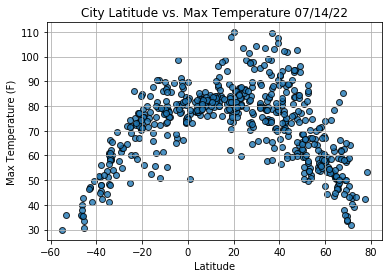

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1_CityLat_vs_Max_Temp.png")

# Show plot.
plt.show()

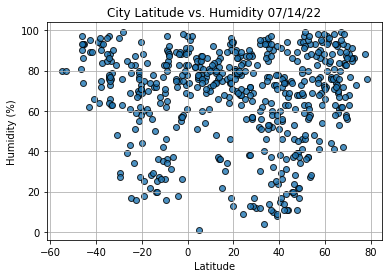

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2_CityLat_vs_humidity.png")
# Show plot.
plt.show()

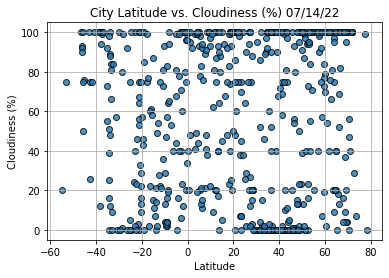

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3_CityLat_vs_Cloudiness.png")
# Show plot.
plt.show()

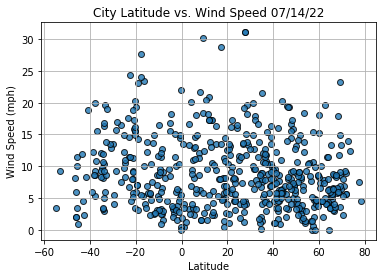

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4_CityLat_vs_WindSpeed.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[17]

City                        Syava
Country                        RU
Date          2022-07-14 14:04:15
Lat                       58.0146
Lng                       46.3222
Max Temp                    71.42
Humidity                       77
Cloudiness                    100
Wind Speed                   4.68
Name: 17, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-07-14 14:04:12,19.7297,-155.0900,73.62,94,100,4.00
2,Tasiilaq,GL,2022-07-14 14:03:54,65.6145,-37.6368,46.56,69,18,5.97
4,Albany,US,2022-07-14 14:03:32,42.6001,-73.9662,73.29,74,10,6.20
7,Yellowknife,CA,2022-07-14 14:01:27,62.4560,-114.3525,53.80,77,100,7.85
8,Lasa,IT,2022-07-14 14:04:13,46.6166,10.7002,83.70,46,93,3.24


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

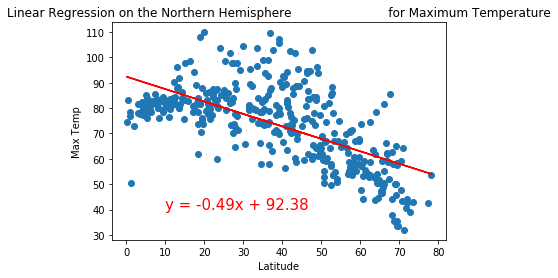

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

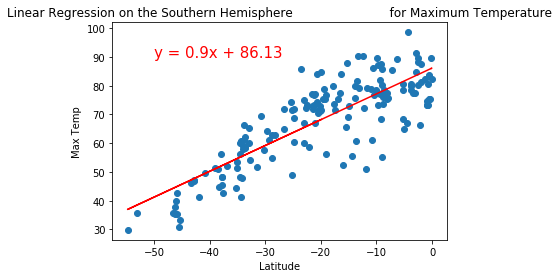

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

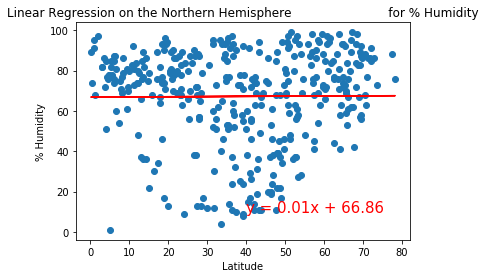

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

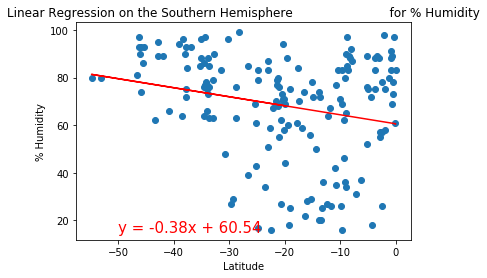

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

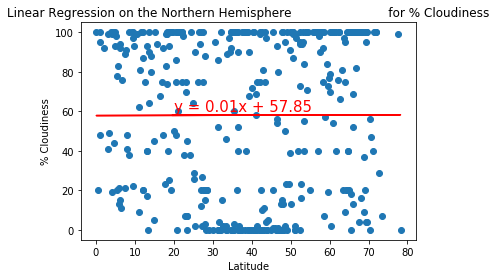

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

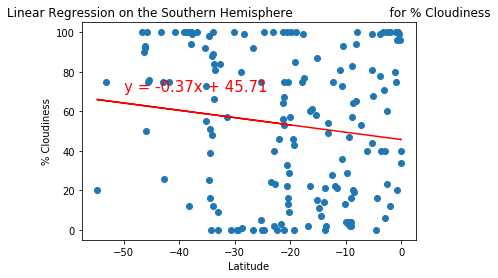

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,70))

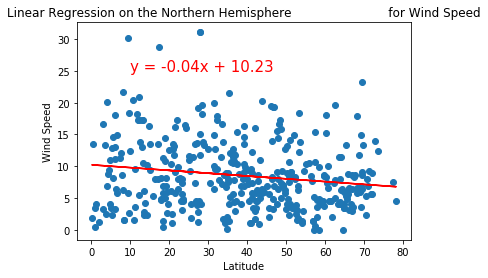

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

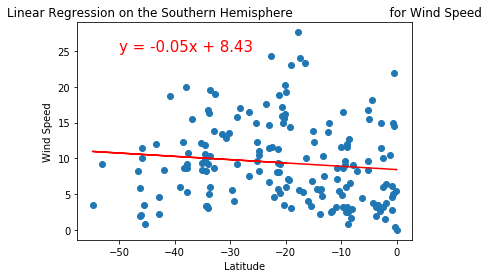

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))